In [92]:
# data science imports
import pandas as pd
import matplotlib.pyplot as plt

# census data imports
import censusdis.data as ced
import censusdis.maps as cem

# other imports
import os

In [12]:
# improves pandas readability
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 250)

In [65]:
# Load the API key
with open("../census_api_key.txt", "r") as f:
    CENSUS_API_KEY = f.read().strip()

# print(CENSUS_API_KEY)

In [66]:
# grab a list of all the available datasets
df_datasets = ced.variables.all_data_sets()
# this will show you a random sample of 5 datasets
df_datasets.sample(5)

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
1197,2017,ECN_EXPSVC,ecnexpsvc,Economic Census: Exported Services Statistics for the U.S.: 2017,"This dataset presents statistics on: the number of establishments; sales, value of shipments, or revenue; number of employees; sales, value of shipments, or revenue from exported services; and response coverage of exported services inquiries for...",http://api.census.gov/data/2017/ecnexpsvc
1541,2023,ACS1_CPROFILE,acs/acs1/cprofile,ACS 1-Year Comparison Profiles,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1/cprofile
480,2004,None,sipp/topical/2004panel/wave3,Wave 3 Survey of Income and Program Participation - 2004 Panel: Topical Modules,SIPP is a nationally representative longitudinal survey that provides comprehensive data about the income and government program participation of individuals and households in the United States. Each interview of the 2004 SIPP Panel included a to...,http://api.census.gov/data/2004/sipp/topical/2004panel/wave3
1589,2024,CPS_BASIC_NOV,cps/basic/nov,Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor force data for the country are used by the Bureau of ...",http://api.census.gov/data/2024/cps/basic/nov
307,2000,CPS_BASIC_AUG,cps/basic/aug,Aug 2000 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor force data for the country are used by the Bureau of L...",http://api.census.gov/data/2000/cps/basic/aug


In [41]:
# search for ACS datasets
df_datasets[df_datasets['TITLE'].str.contains('ACS')].sort_values('YEAR', ascending=False).head()

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
1554,2023,ACSSE,acs/acsse,ACS 1-Year Supplemental Estimates,The American Community Survey (ACS) is a nationwide survey designed to provide communities a fresh look at how they are changing. The ACS replaced the decennial census long form in 2010 and thereafter by collecting long form type information thro...,http://api.census.gov/data/2023/acs/acsse
1547,2023,ACS1_SUBJECT,acs/acs1/subject,ACS 1-Year Subject Tables,The American Community Survey (ACS) is a US-wide survey designed to provide communities a fresh look at how they are changing. The ACS replaced the decennial census long form in 2010 and thereafter by collecting long form type information through...,http://api.census.gov/data/2023/acs/acs1/subject
1540,2023,ACS1,acs/acs1,ACS 1-Year Detailed Tables,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1
1541,2023,ACS1_CPROFILE,acs/acs1/cprofile,ACS 1-Year Comparison Profiles,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1/cprofile
1545,2023,ACS1_SDATAPROFILE_CD119,acs/acs1/sdataprofile/cd119,2023 ACS 1-Year Supplemental Data Profiles for Congressional Redistricting - 119th Congress,"The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demogr...",http://api.census.gov/data/2023/acs/acs1/sdataprofile/cd119


In [ ]:
# base API URL + "groups.html" to get a list of all the available groups
# https://api.census.gov/data/2023/acs/acs1/groups.html
# or use https://censusreporter.org/topics/table-codes

In [67]:
# built in helper
ced.variables.search_groups(
    'acs/acs1', 
    2023, 
    pattern = 'educational attainment', 
    case=False
).head()

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs1,2023,B06009,Place of Birth by Educational Attainment in the United States
1,acs/acs1,2023,B06009PR,Place of Birth by Educational Attainment in Puerto Rico
2,acs/acs1,2023,B07009,Geographical Mobility in the Past Year by Educational Attainment for Current Residence in the United States
3,acs/acs1,2023,B07009PR,Geographical Mobility in the Past Year by Educational Attainment for Current Residence in Puerto Rico
4,acs/acs1,2023,B07409,Geographical Mobility in the Past Year by Educational Attainment for Residence 1 Year Ago in the United States


In [68]:
# our table of interest: public assistance
table = "B09010"

In [69]:
# grab a list of all the available groups
acs_groups = ced.variables.all_variables(
    'acs/acs1', 
    2023,
    group_name=table
)

# output is thorough but not very readable
acs_groups

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2023,acs/acs1,B09010,B09010_001E,Estimate!!Total:,NaN,None
1,2023,acs/acs1,B09010,B09010_002E,"Estimate!!Total:!!Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:",NaN,None
2,2023,acs/acs1,B09010,B09010_003E,"Estimate!!Total:!!Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In family households:",NaN,None
3,2023,acs/acs1,B09010,B09010_004E,"Estimate!!Total:!!Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In family households:!!In married-couple family",NaN,None
4,2023,acs/acs1,B09010,B09010_005E,"Estimate!!Total:!!Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In family households:!!In male householder, no spouse present, family",NaN,None
5,2023,acs/acs1,B09010,B09010_006E,"Estimate!!Total:!!Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In family households:!!In female householder, no spouse present, family",NaN,None
6,2023,acs/acs1,B09010,B09010_007E,"Estimate!!Total:!!Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In nonfamily households",NaN,None
7,2023,acs/acs1,B09010,B09010_008E,"Estimate!!Total:!!Living in household with no Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:",NaN,None
8,2023,acs/acs1,B09010,B09010_009E,"Estimate!!Total:!!Living in household with no Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In family households:",NaN,None
9,2023,acs/acs1,B09010,B09010_010E,"Estimate!!Total:!!Living in household with no Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months:!!In family households:!!In married-couple family",NaN,None


In [70]:
# easier to see in a tree format
ced.variables.group_tree(
    'acs/acs1', 
    2023, 
    group_name = table
)

+ Estimate
    + Total: (B09010_001E)
        + Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months: (B09010_002E)
            + In family households: (B09010_003E)
                + In married-couple family (B09010_004E)
                + In male householder, no spouse present, family (B09010_005E)
                + In female householder, no spouse present, family (B09010_006E)
            + In nonfamily households (B09010_007E)
        + Living in household with no Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months: (B09010_008E)
            + In family households: (B09010_009E)
                + In married-couple family (B09010_010E)
                + In male householder, no spouse present, family (B09010_011E)
                + In female householder, no spouse present, family (B09010_012E)
            + In nonfamily households (B09010_013E)
+ G

In [72]:
# select the variables we want
variables = {
    "B09010_001E": "total",
    "B09010_002E": "with_assistance",
    "NAME": "name"
}

In [142]:
# let's plot commutes from the two counties in Minneapolis, Hennepin and Ramsey

In [143]:
# what's the fips?
assistance = (
    ced.download(
        "acs/acs5",
        2023,
        download_variables = variables.keys(),
        state = "*",
        with_geometry=True
    )
    .rename(
        columns = variables
    )
)

assistance.head(1)



,STATE,total,with_assistance,name,geometry
0,01,1126083,328638,Alabama,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 30.50886, -88.04565 30.51331, -88.04197 30.51738, -88.03867 30.5204, -88.0351 30.52197, -88.03241 30.52145, -88.02916 30.51965, -88.02622 30.51661, -88.02351 30.49257, -88.02433 30.49077, -88.02675 30..."


In [144]:
assistance["percent_assistance"] = assistance["with_assistance"] / assistance["total"] * 100

In [145]:
assistance["percent_assistance"].describe()

count    52.000000
mean     24.316409
std       7.673746
min      11.515077
25%      19.290816
50%      24.743121
75%      27.022542
max      60.544500
Name: percent_assistance, dtype: float64

In [146]:
# check minnesota
assistance[ assistance["name"] == "Minnesota"]

,STATE,total,with_assistance,name,geometry,percent_assistance
23,27,1313453,221103,Minnesota,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 47.96718, -89.58815 47.96998, -89.58662 47.9714, -89.58639 47.97149, -89.58365 47.97249, -89.58237 47.9747, -89.58101 47.9763, -89.58033 47.97778, -89.58203 47.97846, -89.58254 47.97897, -89.58033 47....",16.83372


<Axes: >

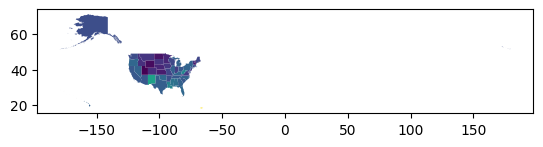

In [147]:
# plot the us
assistance.plot(
    column = "percent_assistance"
)

# it's a bit hard to see because of the non continental states

Text(0.5, 1.0, 'Percent of Households Receiving Public Assistance')

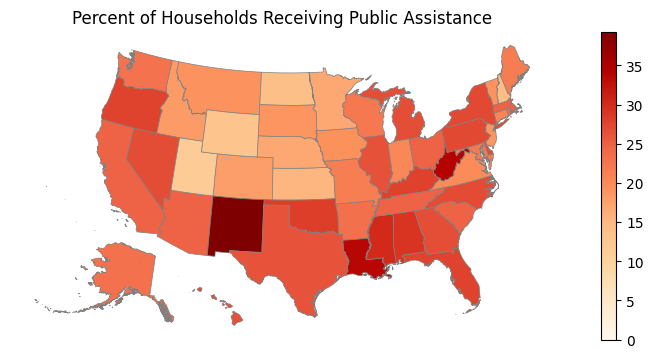

In [162]:
ax = cem.plot_us(
    assistance[ assistance["name"] != "Puerto Rico"], 
    column = "percent_assistance",
    legend = True,
    cmap = "OrRd", # from color brewer
    edgecolor = "gray",
    linewidth = 0.5,
    vmin = 0,
    figsize = (12, 4)
)

ax.axis("off")
ax.set_title("Percent of Households Receiving Public Assistance")